In [2]:
import pandas as pd
df = pd.read_csv("d:/workspace/Python2/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
from sqlalchemy import create_engine
import cx_Oracle

# oracle server에 접속하기 위한 엔진 생성
engine = create_engine('oracle+cx_oracle://python:1234@xe') # oracle_cx_oracle://아이디:비번@db
conn=engine.connect()

# 데이터프레임의 내용을 테이블로 export
df.to_sql(name='iris', con=engine, if_exists='replace', index=False)

150

항공운항 테이블 실습

In [11]:
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()                      
cursor.execute('select * from ontime where rownum < 5')
rows = cursor.fetchall()         
for row in rows:
    print(row)
cursor.close()  
conn.close()

(2007, 1, 2, 2, '1716', 1715, '1820', 1830, 'WN', '1854', 'N323', '64', '75', '55', '-10', '1', 'ALB', 'BWI', '288', '3', '6', '0', None, '0', '0', '0', '0', '0', '0')
(2007, 1, 2, 2, '723', 725, '831', 835, 'WN', '2612', 'N362', '68', '70', '59', '-4', '-2', 'ALB', 'BWI', '288', '3', '6', '0', None, '0', '0', '0', '0', '0', '0')
(2007, 1, 2, 2, '1426', 1425, '1653', 1710, 'WN', '768', 'N402', '327', '345', '287', '-17', '1', 'ALB', 'LAS', '2237', '30', '10', '0', None, '0', '0', '0', '0', '0', '0')
(2007, 1, 2, 2, '1905', 1905, '2205', 2210, 'WN', '1090', 'N716SW', '180', '185', '160', '-5', '0', 'ALB', 'MCO', '1073', '15', '5', '0', None, '0', '0', '0', '0', '0', '0')


In [7]:
# 항공사별 출발 지연시간 평균
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()
cursor.execute('''select uniquecarrier, avg(depdelay) from ontime
group by uniquecarrier''')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{round(row[1], 1)}') # python 코드에서 round 함수를 사용
cursor.close()
conn.close()

XE	11.6
UA	13.6
F9	7.4
NW	8.8
AA	14.3
FL	8.9
AQ	0.4
AS	10.6
OH	12.1
OO	8.1
CO	11.7
YV	11.9
HA	-0.9
WN	10.3
US	11.9
MQ	12.6
9E	8.8
EV	19.6
DL	7.7
B6	14.5


In [16]:
# 항공사별 도착 지연시간 평균
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()
cursor.execute('''select uniquecarrier, round(avg(arrdelay), 1) from ontime
group by uniquecarrier''') # SQL문에서 round 함수를 사용
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

NW	12.3
XE	9.7
UA	12.4
F9	7.4
AA	14
FL	7.8
AQ	-1.4
AS	9.1
OO	8.6
OH	12.6
CO	10.1
YV	10.5
HA	-0.4
WN	5.4
US	11.3
9E	7.9
MQ	12.4
EV	16.6
DL	7.2
B6	13.1


In [24]:
# 2007년 도착지연횟수 월별 집계
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()
cursor.execute('''select month, count(*) from ontime where year=2007 and arrdelay > 0
group by month order by month''')
rows = cursor.fetchall()
for row in rows:
    print(row)
cursor.close()
conn.close()


(1, 286334)
(2, 284152)
(3, 293360)
(4, 273055)
(5, 275332)
(6, 326446)
(7, 326559)
(8, 317197)
(9, 225751)
(10, 270098)
(11, 242722)
(12, 332449)


In [25]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[286334, 284152, 293360, 273055, 275332, 326446, 326559, 317197, 225751, 270098, 242722, 332449]


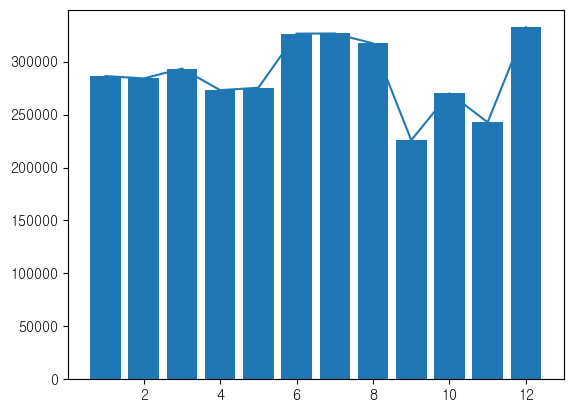

In [26]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [27]:
#요일별 평균 지연 시간
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()                      
cursor.execute('''select dayofweek, avg(arrdelay)
from ontime
group by dayofweek''')    
rows = cursor.fetchall()         
for row in rows:
    print(row)

cursor.close()
conn.close()

(6, 5.735648821755891)
(7, 10.097206685656515)
(1, 10.280262729735707)
(2, 8.047561475371838)
(5, 12.747663814379557)
(4, 12.363173179756918)
(3, 9.697532644293378)


In [28]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[5.735648821755891, 10.097206685656515, 10.280262729735707, 8.047561475371838, 12.747663814379557, 12.363173179756918, 9.697532644293378]


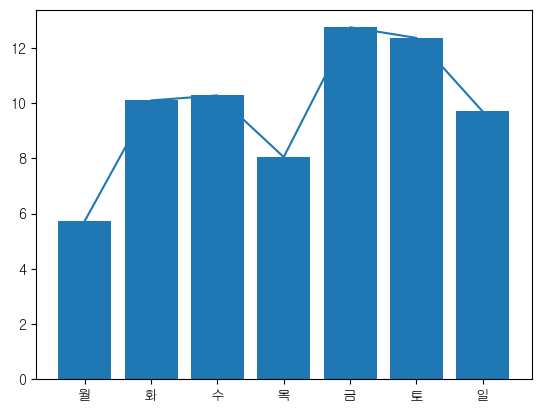

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)
plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [30]:
#시간대별( 10월, 월요일에 출발할 때 가장 좋은 시간대는? )
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")
cursor = conn.cursor()                      
cursor.execute('''
select *
from (
    select rownum as rn, A.*
    from (
select CRSDepTime, avg(arrdelay) arrdelay
from ontime
where month=10  and dayofweek=1
group by CRSDepTime
order by arrdelay
    ) A
) where rn between 1 and 5
''') # SUB 쿼리 = 쿼리 = 서브쿼리의 조건의 조건중 조건(서브쿼리 = 서브쿼리의 조건중 조건(서브쿼리 = 전체중조건)) 형태
rows = cursor.fetchall()         
for row in rows:
    print(row)
cursor.close()
conn.close()

(1, 1924, -47)
(2, 2257, -32)
(3, 300, -29.4)
(4, 2244, -20)
(5, 1801, -18.6)
